In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

In [12]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

In [19]:
data = pd.read_csv('/Users/rufen/Downloads/Waze_cleaned_data')

print(data.shape)
data.head()

(14999, 8)


,drives,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,duration_minutes_drives,activity_days,device,churned
0,226,2276,208,0,1985.775061,28,Android,0
1,107,1225,19,64,3160.472914,13,iPhone,0
2,95,2651,0,0,1610.735904,14,Android,0
3,40,15,322,7,587.196542,7,iPhone,0
4,68,1562,166,5,1219.555924,27,Android,0


/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_73984/2641088788.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().churned.sort_values()[:-1].plot.barh(color='#555555')


Text(0.5, 1.0, 'Correlation of churned and other features')

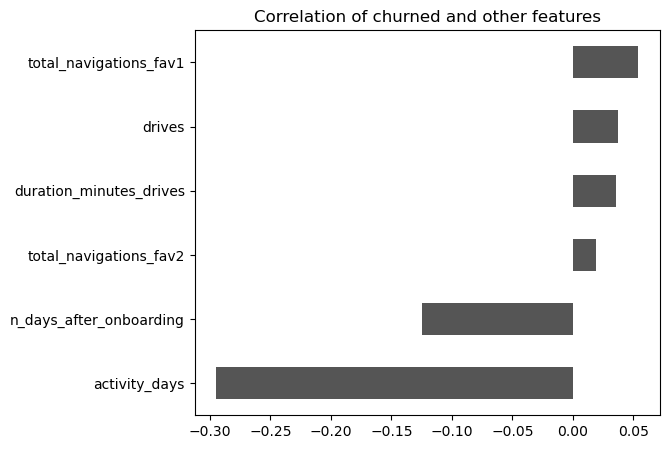

In [20]:
#see correlations
plt.figure(figsize=(6,5))
data.corr().churned.sort_values()[:-1].plot.barh(color='#555555')
plt.title('Correlation of churned and other features')

# Down/Up sampling 

In [21]:
#see target variables 
print(data['churned'].value_counts())
print(data['churned'].value_counts(normalize=True))

0    12463
1     2536
Name: churned, dtype: int64
0    0.830922
1    0.169078
Name: churned, dtype: float64


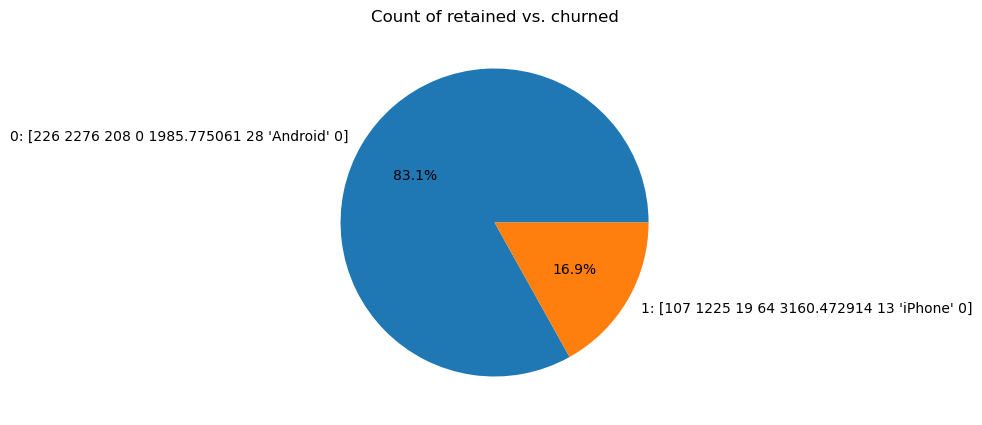

In [22]:
# Pie chart
fig = plt.figure(figsize=(5,5))
data_plot=data['churned'].value_counts()
plt.pie(data_plot,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

# Train/Validate/Test split